In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from tensorflow.keras.preprocessing import image
from keras.preprocessing import sequence
import itertools 
from keras.layers import Embedding
from keras.datasets import imdb
import matplotlib.pyplot as plt
from keras import backend as K
import tensorflow as tf
from glob import glob
import numpy as np
import PIL.Image
import PIL
import cv2
import os

In [2]:
img=image.load_img("Potato/Train/Potato___healthy/Potato_healthy-76-_0_2420.jpg")

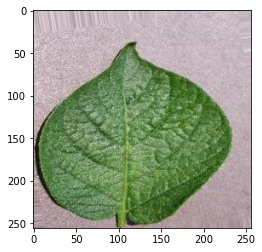

In [3]:
plt.imshow(img)

In [4]:
imgg="Potato/Train/Potato___healthy/Potato_healthy-76-_0_2420.jpg";

In [5]:
cv2.imread(imgg).shape

(256, 256, 3)

In [6]:
cv2.imread(imgg)

array([[[198, 191, 206],
        [165, 158, 173],
        [191, 184, 199],
        ...,
        [184, 175, 188],
        [183, 174, 187],
        [182, 173, 186]],

       [[199, 192, 207],
        [169, 162, 177],
        [189, 182, 197],
        ...,
        [187, 178, 191],
        [188, 179, 192],
        [189, 180, 193]],

       [[200, 193, 208],
        [176, 169, 184],
        [185, 178, 193],
        ...,
        [201, 192, 205],
        [201, 192, 205],
        [201, 192, 205]],

       ...,

       [[166, 161, 182],
        [166, 161, 182],
        [165, 160, 181],
        ...,
        [154, 148, 167],
        [171, 165, 184],
        [186, 180, 199]],

       [[149, 144, 165],
        [149, 144, 165],
        [149, 144, 165],
        ...,
        [152, 146, 165],
        [169, 163, 182],
        [187, 181, 200]],

       [[150, 145, 166],
        [149, 144, 165],
        [146, 141, 162],
        ...,
        [151, 145, 164],
        [168, 162, 181],
        [187, 181, 200]]

In [7]:
train=ImageDataGenerator(rescale=1/255)
valid=ImageDataGenerator(rescale=1/255)

In [8]:
trainpath='Potato/Train'
validpath='Potato/Valid'

In [9]:
train_dataset=train.flow_from_directory(trainpath, 
                                                        target_size=(124,124),
                                                         batch_size=16,
                                                        class_mode='categorical')

valid_dataset=valid.flow_from_directory(validpath,
                                                        target_size=(124,124),
                                                         batch_size=16,
                                                        class_mode='categorical')

Found 900 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


In [10]:
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(124,124,3)))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 122, 122, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 61, 61, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 61, 61, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 59, 59, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 29, 29, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0

In [12]:
model.compile(loss='mean_squared_error', optimizer="adam",metrics=['accuracy'])

In [13]:

history=model.fit( train_dataset, epochs=5, steps_per_epoch=48
                  , validation_data=(valid_dataset), validation_steps=12)

Epoch 1/5
48/48 [==============================] - 7s 126ms/step - loss: 0.2675 - accuracy: 0.6362 - val_loss: 0.2256 - val_accuracy: 0.6667
Epoch 2/5
48/48 [==============================] - 5s 114ms/step - loss: 0.2225 - accuracy: 0.6667 - val_loss: 0.2254 - val_accuracy: 0.6667
Epoch 3/5
48/48 [==============================] - 5s 114ms/step - loss: 0.2224 - accuracy: 0.6667 - val_loss: 0.2246 - val_accuracy: 0.6667
Epoch 4/5
48/48 [==============================] - 6s 116ms/step - loss: 0.2224 - accuracy: 0.6667 - val_loss: 0.2244 - val_accuracy: 0.6667
Epoch 5/5
48/48 [==============================] - 6s 117ms/step - loss: 0.2223 - accuracy: 0.6667 - val_loss: 0.2246 - val_accuracy: 0.6667


In [14]:
valid_score = model.evaluate_generator(valid_dataset, steps=2, verbose=1)
print("[INFO] accuracy: {:.2f}%".format(valid_score[1] * 100)) 
print("[INFO] Loss: ",valid_score[0])

2/2 [==============================] - 0s 44ms/step - loss: 0.2245 - accuracy: 0.6667
[INFO] accuracy: 66.67%
[INFO] Loss:  0.2245313972234726


/home/abdullah/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


In [15]:
train_score = model.evaluate_generator(train_dataset,steps=2, verbose=1)

print("[INFO] accuracy: {:.2f}%".format(train_score[1] * 100)) 

print("[INFO] Loss: ",train_score[0])

2/2 [==============================] - 0s 32ms/step - loss: 0.2246 - accuracy: 0.6667
[INFO] accuracy: 66.67%
[INFO] Loss:  0.2245517373085022


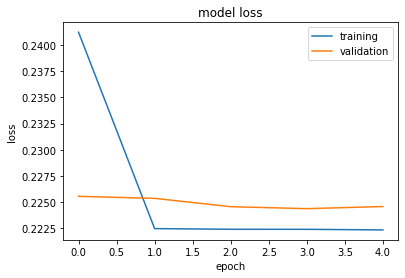

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

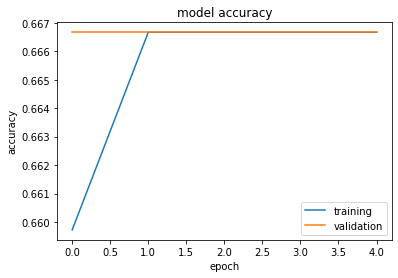

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='lower right')
plt.show()

In [18]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [19]:
test_generator = test_datagen.flow_from_directory(
        'Potato/Test',
        target_size=(124, 124),
        batch_size=16,
        class_mode='categorical') 

Found 300 images belonging to 3 classes.


In [20]:
history=model.fit( test_generator, epochs=5, steps_per_epoch=18)

Epoch 1/5
18/18 [==============================] - 2s 121ms/step - loss: 0.2223 - accuracy: 0.6667
Epoch 2/5
18/18 [==============================] - 2s 118ms/step - loss: 0.2223 - accuracy: 0.6667
Epoch 3/5
18/18 [==============================] - 2s 118ms/step - loss: 0.2223 - accuracy: 0.6667
Epoch 4/5
18/18 [==============================] - 2s 111ms/step - loss: 0.2223 - accuracy: 0.6667
Epoch 5/5
18/18 [==============================] - 2s 106ms/step - loss: 0.2223 - accuracy: 0.6667


In [21]:
test_score = model.evaluate_generator(test_generator,steps=2, verbose=1)

print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 

print("[INFO] Loss: ",test_score[0])

2/2 [==============================] - 0s 35ms/step - loss: 0.2239 - accuracy: 0.6667
[INFO] accuracy: 66.67%
[INFO] Loss:  0.2239188700914383
